In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import radTrans as rt
from scipy.interpolate import interp1d
import importlib
importlib.reload(rt)


<module 'radTrans' from '/Users/rishabhdatta/Dropbox (MIT)/PUFFIN/Codes/MARZ/SVS_Analysis_minimum_example/radTrans.py'>

# This code simulates synthetic intensity spectra by solving radiation transport for given gaussian density & temperature

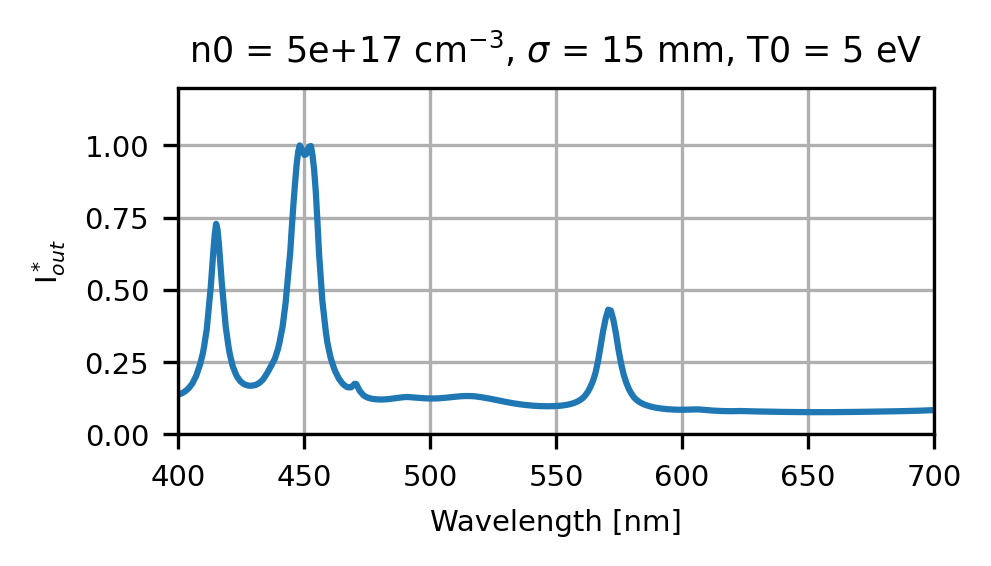

In [3]:
E = np.load('./Data/E.npy')
n0 = 5e17 # cm^-3, peak denisty
T0 = 5 # eV, Temp.
sig = 15e-3 # s.d. of gaussian density distribution, set to 0 for homogenous density
Iout = rt.generateSpectrum(n0,sig,T0,E,smax=2 * 2.355 * sig)

# Plot
plt.rcParams.update({'font.size': 7})
fig,axs=plt.subplots(1,1,figsize=(6.5/2,3/2),dpi=300)
axs.plot(1239.8/E,Iout,label='Rad. Transport')
axs.set_xlabel('Wavelength [nm]')
axs.set_ylabel('I$_{out}^*$')
axs.set_title('n0 = %1.3g cm$^{-3}$, $\sigma$ = %1.2g mm, T0 = %1.2g eV' % (n0,sig*1e3,T0))
axs.set_xlim([400,700])
axs.set_ylim([0,1.2])
axs.grid()
plt.show()

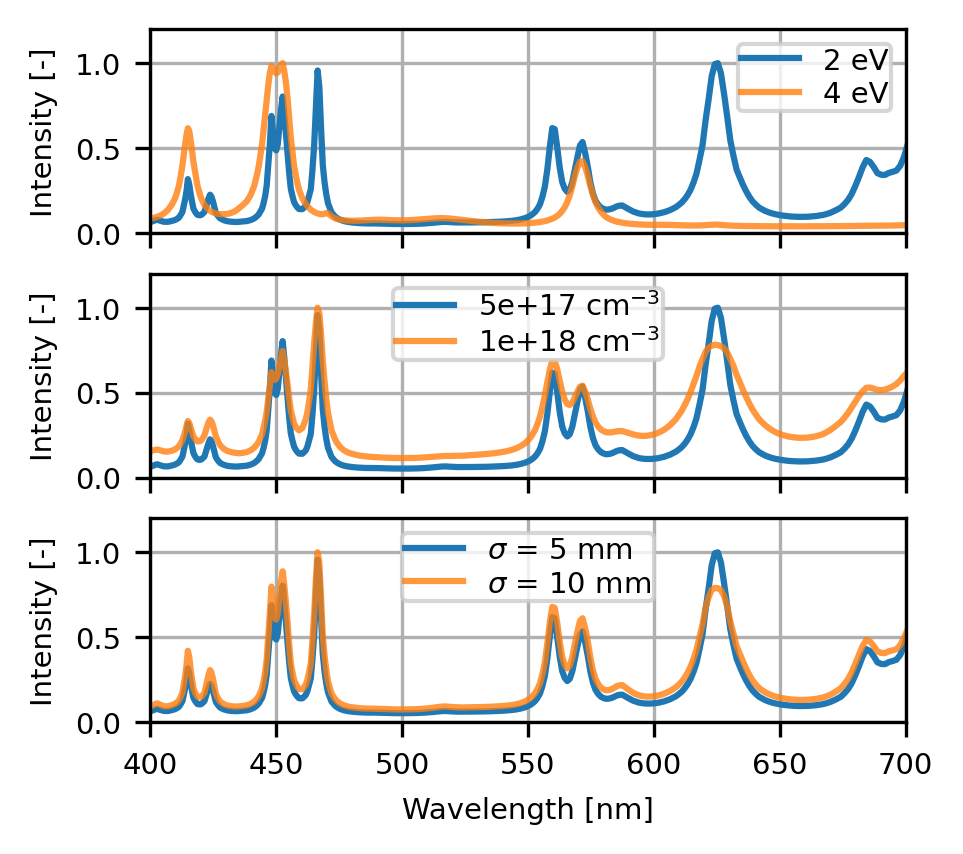

In [4]:
# Shows the effect of changing denisty temp. and sigma

# Plot
plt.rcParams.update({'font.size': 7})
fig,axs=plt.subplots(3,1,figsize=(6.5/2,3/2*2),dpi=300,sharex=True)

# Temp. variation 

E = np.load('./Data/E.npy')
n0 = 5e17
T0 = 2
sig = 5e-3
Iout = rt.generateSpectrum(n0,sig,T0,E,smax=2 * 2.355 * sig)


axs[0].plot(1239.8/E,Iout,label='%1.2g eV' % (T0))
axs[1].plot(1239.8/E,Iout,label='%1.3g cm$^{-3}$' % (n0))
axs[2].plot(1239.8/E,Iout,label='$\sigma$ = %1.2g mm' % (sig*1e3))

n0 = 5e17
T0 = 4
sig = 5e-3
Iout = rt.generateSpectrum(n0,sig,T0,E,smax=2 * 2.355 * sig)
axs[0].plot(1239.8/E,Iout,label='%1.2g eV' % (T0),alpha=0.8)


# Density variation

n0 = 1e18
T0 = 2
sig = 5e-3
Iout = rt.generateSpectrum(n0,sig,T0,E,smax=2 * 2.355 * sig)
axs[1].plot(1239.8/E,Iout,label='%1.3g cm$^{-3}$' % (n0),alpha=0.8)

# sigma variation

n0 = 5e17
T0 = 2
sig = 10e-3
Iout = rt.generateSpectrum(n0,sig,T0,E,smax=2 * 2.355 * sig)
axs[2].plot(1239.8/E,Iout,label='$\sigma$ = %1.2g mm' % (sig*1e3),alpha=0.8)


axs[-1].set_xlabel('Wavelength [nm]')
for ii in range(axs.shape[0]):
    axs[ii].legend(frameon=True,labelspacing = 0.2,borderpad=0.1)
    axs[ii].set_ylim([0,1.2])
    axs[ii].set_yticks([0,0.5,1])
    axs[ii].grid()
    axs[ii].set_ylabel('Intensity [-]')

axs[-1].set_xlim([400,700])


plt.show()

saveDir = '/Users/rishabhdatta/Dropbox (MIT)/PUFFIN/Writing/Figures/ML_paper/'
fig.savefig(saveDir+'variableEffect.png',bbox_inches='tight')



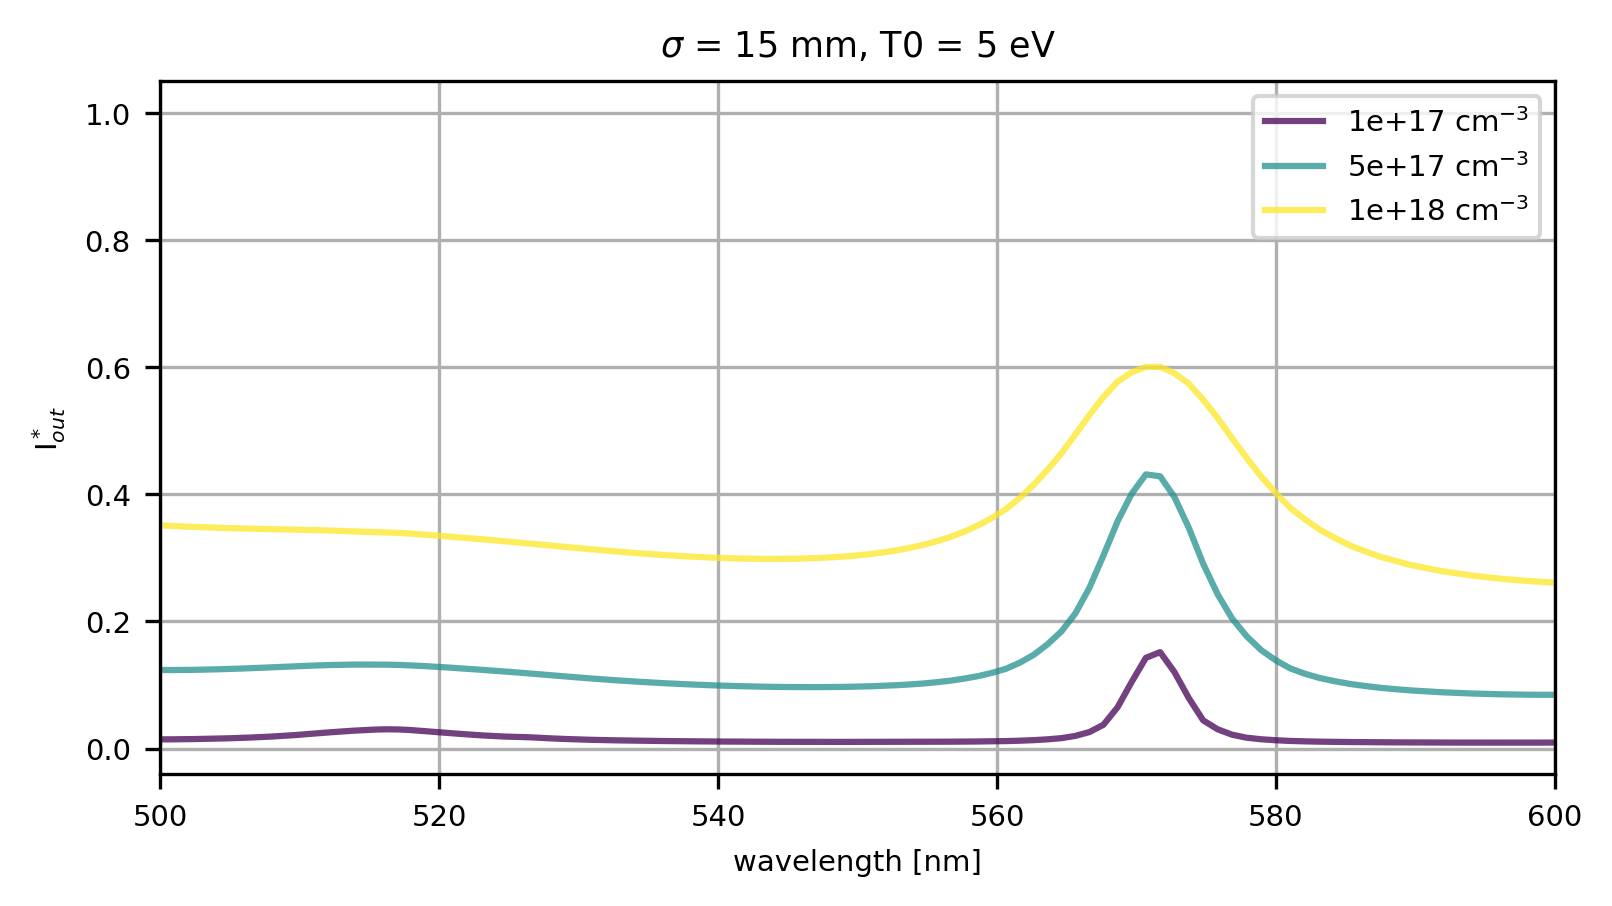

In [5]:
# How does the width of the Al-II 466.4 line change w/ density 

import matplotlib.cm as cm

n0 = [1e17,5e17,1e18]
sig = 15e-3
T0 = 5
colors = cm.viridis(np.linspace(0, 1, len(n0)))
fig,axs = plt.subplots(1,1,figsize=(6,3),dpi=300)
for ii in range(len(n0)):
    Iout = rt.generateSpectrum(n0[ii],sig,T0,E,smax=2 * 2.355 * sig)
    axs.plot(1239.8/E,Iout,color=colors[ii],label=str(n0[ii])+' cm$^{-3}$',alpha=0.75)
axs.set_title('$\sigma$ = %1.2g mm, T0 = %1.2g eV' % (sig*1e3,T0))
axs.set_xlabel('wavelength [nm]')
axs.set_ylabel('I$_{out}^*$')
axs.legend()
axs.grid()
axs.set_xlim([500,600])
plt.show()



# Compare spectra at different temperatures

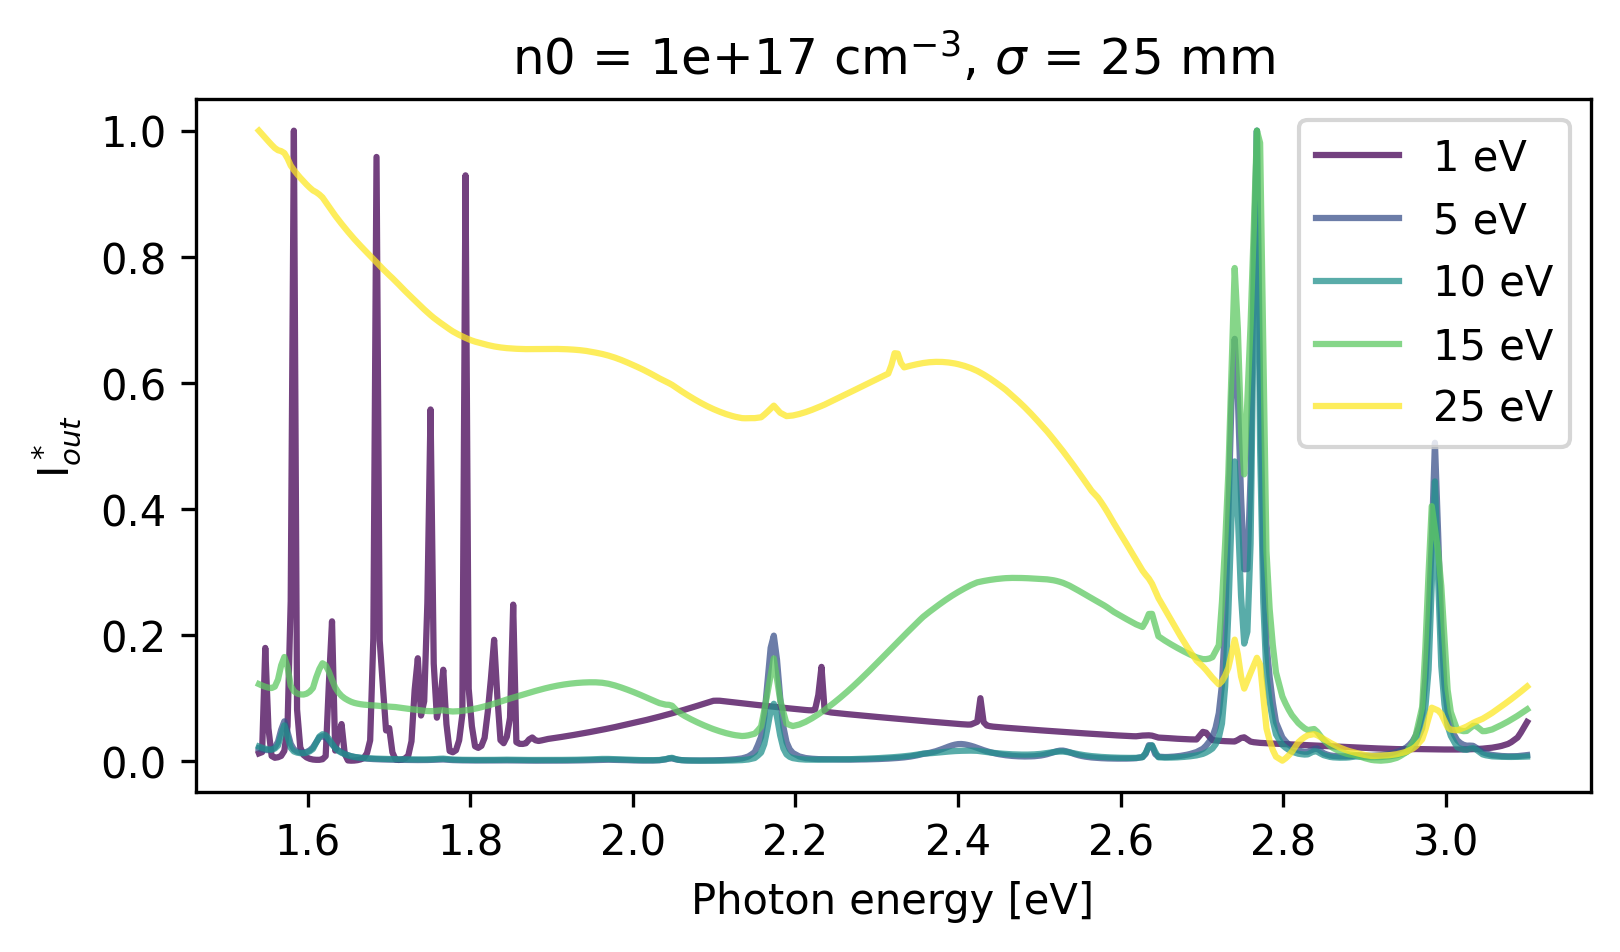

In [5]:


T0 = [1,5,10,15,25]
n0 = 1e17
sig = 25e-3
fig,axs = plt.subplots(1,1,figsize=(6,3),dpi=300)
for ii in range(len(T0)):
    Iout = rt.generateSpectrum(ni0=n0,sig=sig,T0=T0[ii],E=E,smax=60e-3)
    axs.plot(E,Iout,color=colors[ii],label=str(T0[ii])+' eV',alpha=0.75)
axs.set_title('n0 = %1.3g cm$^{-3}$, $\sigma$ = %1.2g mm' % (n0,sig*1e3))
axs.set_xlabel('Photon energy [eV]')
axs.set_ylabel('I$_{out}^*$')
axs.legend()
plt.show()

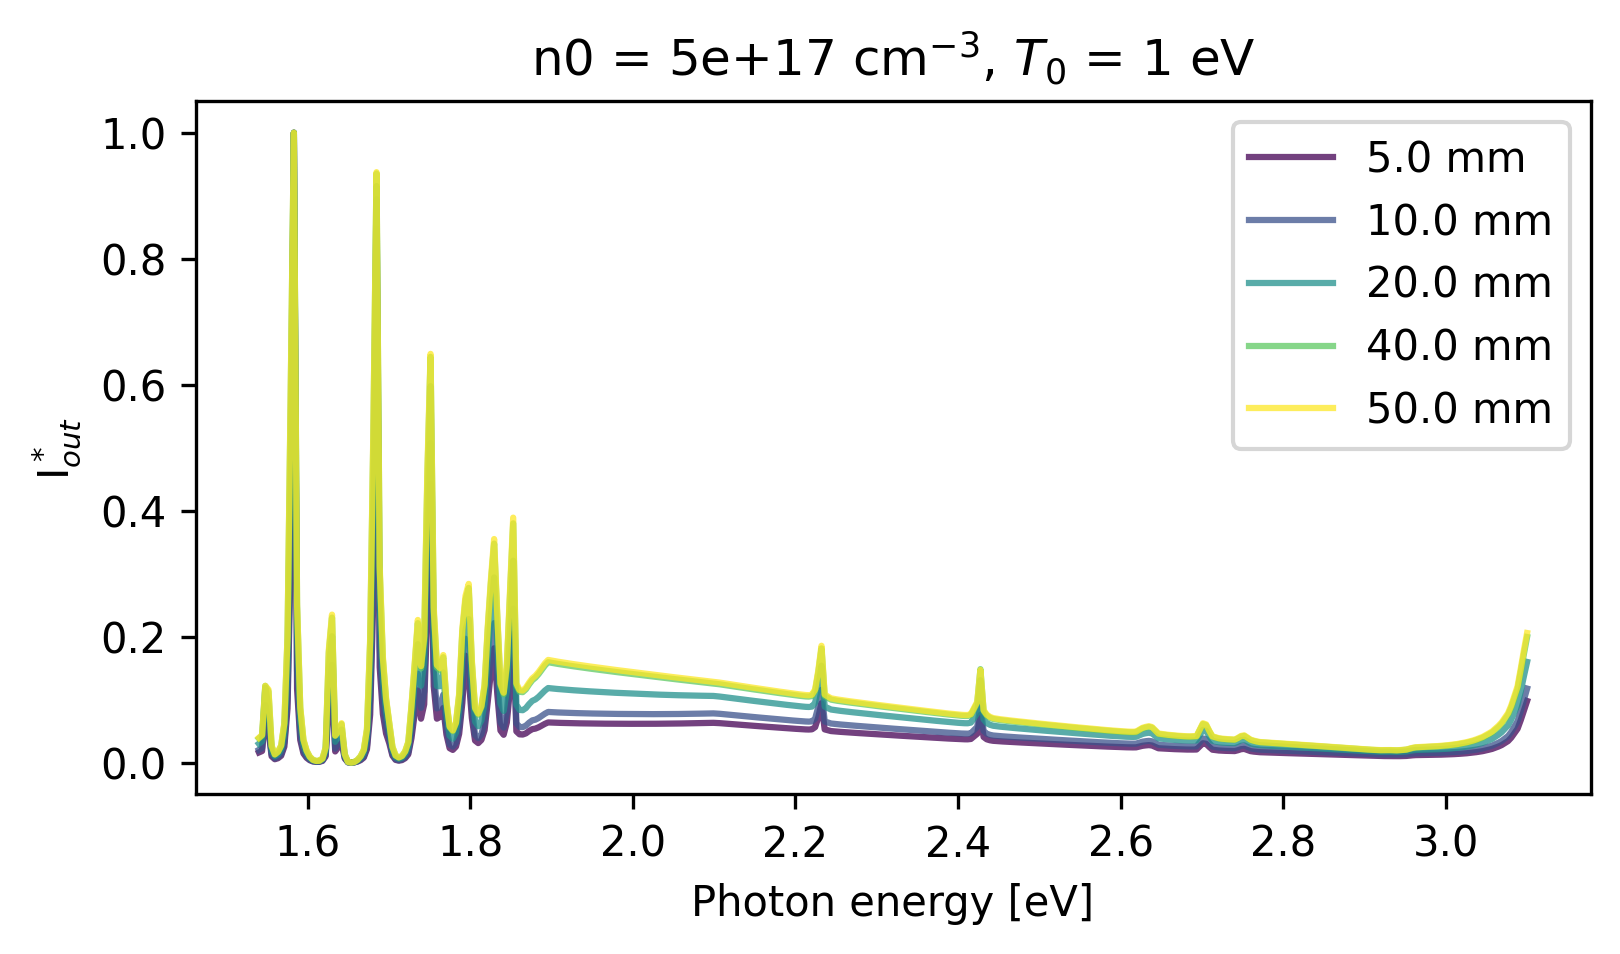

In [6]:

sig = [5e-3,10e-3,20e-3,40e-3,50e-3]
n0 = 5e17
T0 = 1
fig,axs = plt.subplots(1,1,figsize=(6,3),dpi=300)
for ii in range(len(sig)):
    Iout = rt.generateSpectrum(ni0=n0,sig=sig[ii],T0=T0,E=E,smax=60e-3)
    axs.plot(E,Iout,color=colors[ii],label=str(sig[ii]*1e3)+' mm',alpha=0.75)
axs.set_title('n0 = %1.3g cm$^{-3}$, $T_0$ = %1.2g eV' % (n0,T0))
axs.set_xlabel('Photon energy [eV]')
axs.set_ylabel('I$_{out}^*$')
axs.legend()
plt.show()

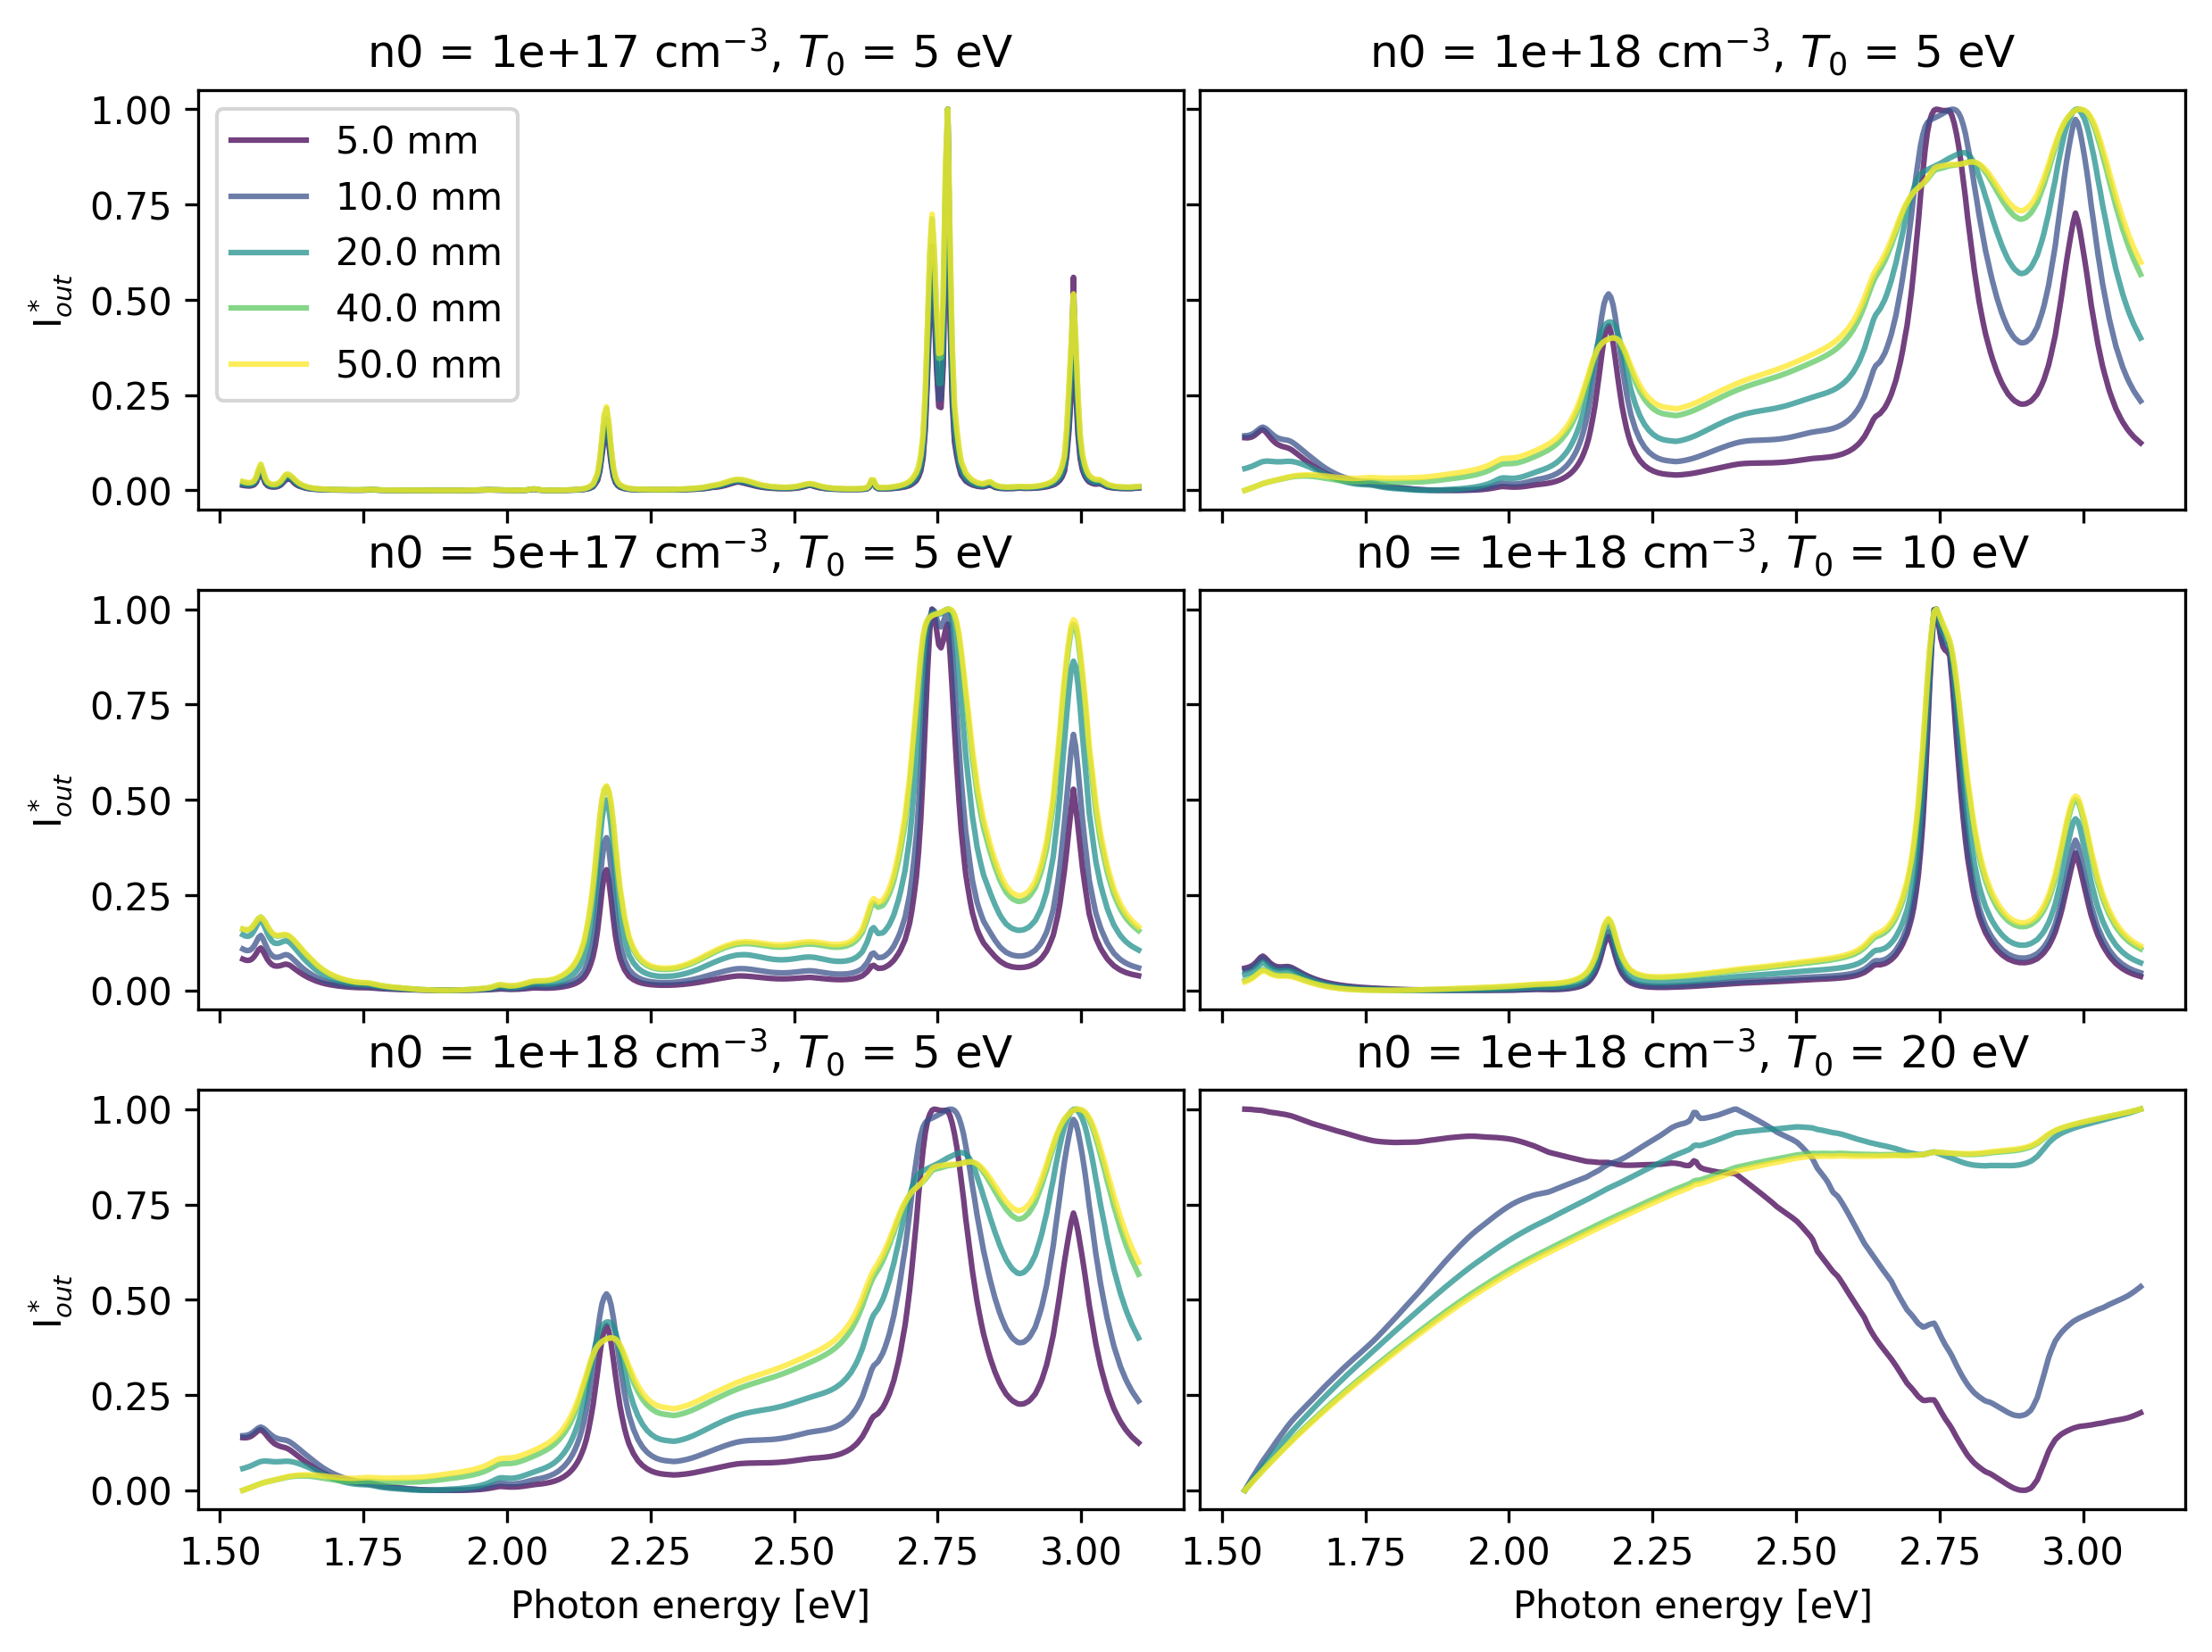

In [12]:
n0 = [1e17,5e17,1e18]
T0 = [5,10,20]
sig = [5e-3,10e-3,20e-3,40e-3,50e-3]

fig,axs = plt.subplots(3,2,figsize=(8,6),dpi=300,sharex=True,sharey=True)
for jj in range(len(n0)):
    for ii in range(len(sig)):
        Iout = rt.generateSpectrum(ni0=n0[jj],sig=sig[ii],T0=T0[0],E=E,smax=60e-3)
        axs[jj,0].plot(E,Iout,color=colors[ii],label=str(sig[ii]*1e3)+' mm',alpha=0.75)
        axs[jj,0].set_title('n0 = %1.3g cm$^{-3}$, $T_0$ = %1.2g eV' % (n0[jj],T0[0]))
        axs[jj,0].set_ylabel('I$_{out}^*$')
        
for jj in range(len(T0)):
    for ii in range(len(sig)):
        Iout = rt.generateSpectrum(ni0=n0[-1],sig=sig[ii],T0=T0[jj],E=E,smax=60e-3)
        axs[jj,1].plot(E,Iout,color=colors[ii],label=str(sig[ii]*1e3)+' mm',alpha=0.75)
        axs[jj,1].set_title('n0 = %1.3g cm$^{-3}$, $T_0$ = %1.2g eV' % (n0[-1],T0[jj]))

axs[-1,0].set_xlabel('Photon energy [eV]')
axs[-1,1].set_xlabel('Photon energy [eV]')
axs[0,0].legend()
fig.tight_layout(pad=0.1)
plt.show()